# Coding Block 1 - Random Forests (and XGBoost)

### Load the packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
'''
...
'''

'\n...\n'

### Read the dataset 
You can also compare processed and non-processed data.

In [13]:
df = pd.read_csv('../data/df_imputed_clean.csv')
df = df.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier', 'Unnamed: 0'])

### Split the data and train a Random Forest model

Accuracy: 0.7877
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        97
         1.0       0.68      0.69      0.69        49

    accuracy                           0.79       146
   macro avg       0.76      0.76      0.76       146
weighted avg       0.79      0.79      0.79       146



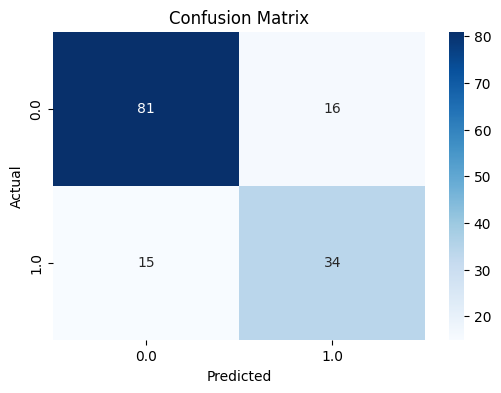

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['Outcome'])  # Replace 'target' with the actual target column name
y = df['Outcome']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Evaluate the prediction models using a classification report

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        97
         1.0       0.76      0.63      0.69        49

    accuracy                           0.81       146
   macro avg       0.79      0.76      0.78       146
weighted avg       0.80      0.81      0.80       146



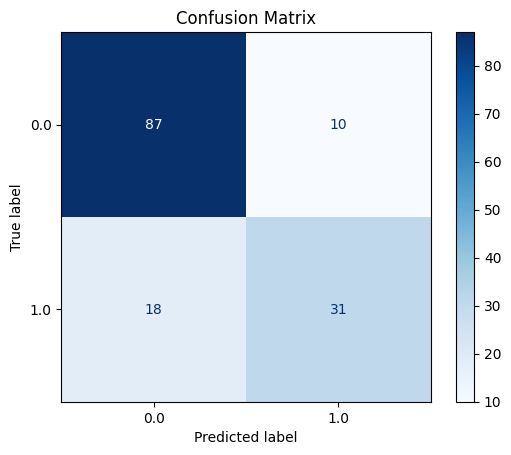

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Assuming df is already loaded and contains the target variable 'Outcome'
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### Print the feature importances of the random forest

/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_58984/1757663276.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


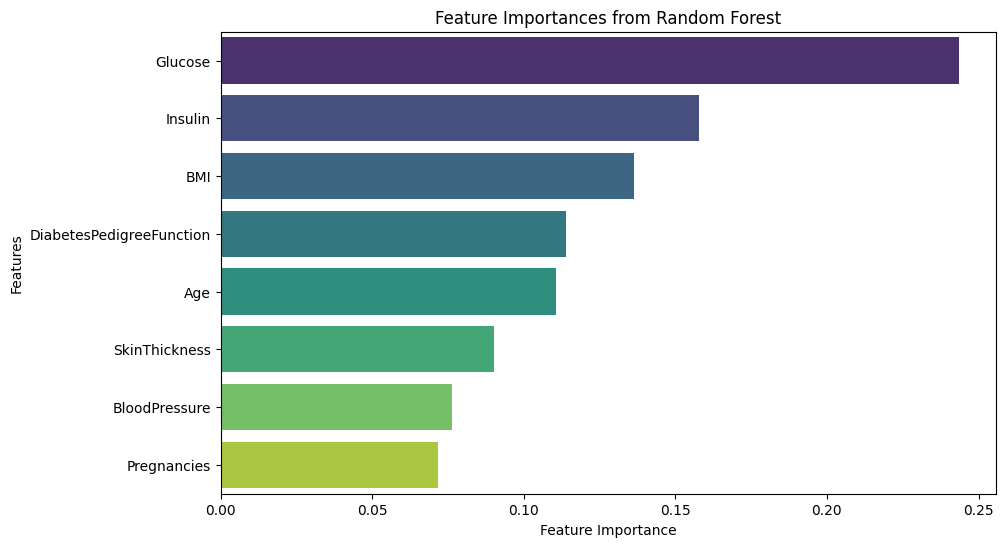

                    Feature  Importance
1                   Glucose    0.243439
4                   Insulin    0.157758
5                       BMI    0.136308
6  DiabetesPedigreeFunction    0.113804
7                       Age    0.110566
3             SkinThickness    0.090107
2             BloodPressure    0.076204
0               Pregnancies    0.071815


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming df is already loaded and contains the target variable 'Outcome'
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()

# Print feature importances
print(feature_importance_df)


### Extra: Also train a XGBoost model and compare the results.

/Users/chrisoesterreich/Developement/anaconda3/envs/donnerstag/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20250320_102712"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       2.91 GB / 16.00 GB (18.2%)
Disk Space Avail:   14.74 GB / 460.43 GB (3.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (aut

                       model  score_test  score_val eval_metric  \
0    RandomForest_r34_BAG_L1       0.805   0.742911    accuracy   
1     ExtraTrees_r126_BAG_L1       0.795   0.763705    accuracy   
2        WeightedEnsemble_L2       0.795   0.767486    accuracy   
3     ExtraTrees_r172_BAG_L1       0.790   0.750473    accuracy   
4   RandomForest_r195_BAG_L1       0.790   0.737240    accuracy   
5      ExtraTreesEntr_BAG_L1       0.790   0.750473    accuracy   
6       ExtraTrees_r4_BAG_L1       0.785   0.742911    accuracy   
7     ExtraTrees_r178_BAG_L1       0.780   0.761815    accuracy   
8   RandomForest_r127_BAG_L1       0.780   0.737240    accuracy   
9    RandomForest_r39_BAG_L1       0.780   0.739130    accuracy   
10   RandomForestGini_BAG_L1       0.780   0.741021    accuracy   
11   RandomForest_r15_BAG_L1       0.775   0.746692    accuracy   
12   RandomForestEntr_BAG_L1       0.775   0.748582    accuracy   
13     ExtraTrees_r42_BAG_L1       0.775   0.742911    accurac

	0.6s	= Actual runtime (Completed 5 of 5 shuffle sets)


                          importance    stddev   p_value  n  p99_high  \
Glucose                        0.090  0.021794  0.000382  5  0.134875   
Age                            0.024  0.012450  0.006270  5  0.049635   
Insulin                        0.020  0.007071  0.001599  5  0.034559   
BMI                            0.017  0.011511  0.014933  5  0.040701   
DiabetesPedigreeFunction       0.016  0.007416  0.004249  5  0.031270   
BloodPressure                  0.007  0.009747  0.091783  5  0.027069   
SkinThickness                  0.005  0.006124  0.070964  5  0.017609   
Pregnancies                   -0.001  0.013874  0.560112  5  0.027568   

                           p99_low  
Glucose                   0.045125  
Age                      -0.001635  
Insulin                   0.005441  
BMI                      -0.006701  
DiabetesPedigreeFunction  0.000730  
BloodPressure            -0.013069  
SkinThickness            -0.007609  
Pregnancies              -0.029568  


/var/folders/rx/tkw33hfs52z28pdphr1bqg100000gn/T/ipykernel_58984/1883560286.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["importance"], y=feature_importance.index, palette="viridis")


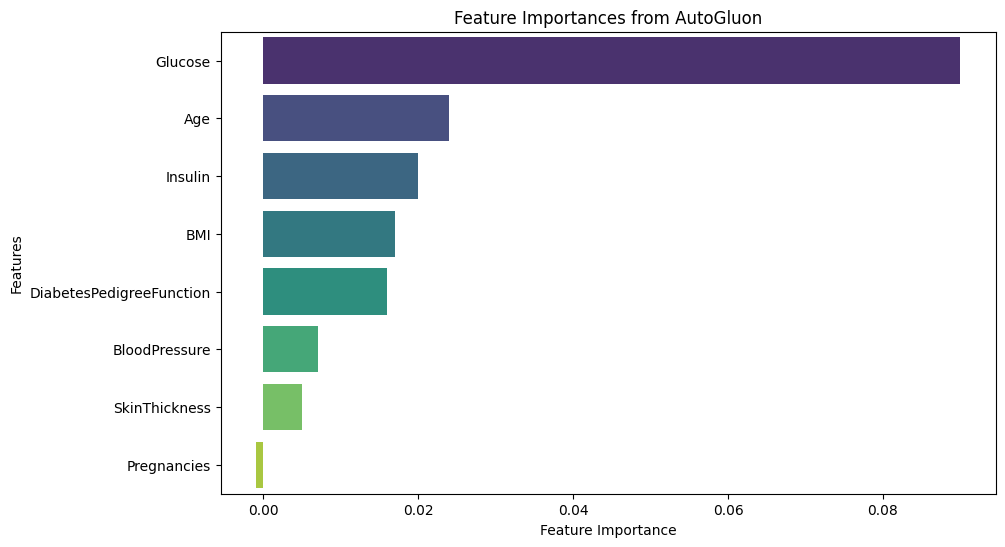

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor

# Load dataset (assuming df is preloaded)
label = "Outcome"  # Define target variable
train_data, test_data = df.iloc[:-200], df.iloc[-200:]  # Example split

# Train AutoGluon models (including XGBoost & Random Forest)
predictor = TabularPredictor(label=label).fit(train_data, presets="best_quality")

# Evaluate AutoGluon performance
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

# Get model predictions
preds = predictor.predict(test_data.drop(columns=[label]))

# Print classification report
from sklearn.metrics import classification_report
print("AutoGluon Classification Report:\n", classification_report(test_data[label], preds))

# Feature Importance Analysis
feature_importance = predictor.feature_importance(test_data)
print(feature_importance)

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance["importance"], y=feature_importance.index, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from AutoGluon")
plt.show()
